In [39]:
import numpy
import math
from matplotlib import pyplot
%matplotlib inline

In [40]:
N = 50                          
x_start, x_end = -0.5, 0.5          
y_start, y_end = -0.5, 0.5  
x = numpy.linspace(x_start, x_end, N)  
y = numpy.linspace(y_start, y_end, N)  
X, Y = numpy.meshgrid(x, y)         

In [41]:
gamma = 6                    
x_vortex, y_vortex = [-1.0,-0.9,-0.8,-0.7,-0.6,-0.5,-0.4,-0.3,-0.2,-0.1,0.0,0.2,0.1,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],\
                     [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.,0.,0.,0.,0.,0.]

In [42]:
def get_velocity_vortex(strength, xv, yv, X, Y):
    u = + strength/(2*math.pi)*(Y-yv)/((X-xv)**2+(Y-yv)**2)
    v = - strength/(2*math.pi)*(X-xv)/((X-xv)**2+(Y-yv)**2)
    
    return u, v

In [43]:
def get_stream_function_vortex(strength, xv, yv, X, Y):
    psi = strength/(4*math.pi)*numpy.log((X-xv)**2+(Y-yv)**2)
    
    return psi

In [44]:
u = numpy.zeros((N,N),dtype = float)
v = numpy.zeros((N,N),dtype = float)
psi = numpy.zeros((N,N),dtype = float)
for i in range (len(x_vortex)):
    u_vortex, v_vortex = get_velocity_vortex(gamma, x_vortex[i], y_vortex[i], X, Y)
    v+=v_vortex
    u+=u_vortex
    psi_vortex = get_stream_function_vortex(gamma, x_vortex[i], y_vortex[i], X, Y)
    psi+=psi_vortex

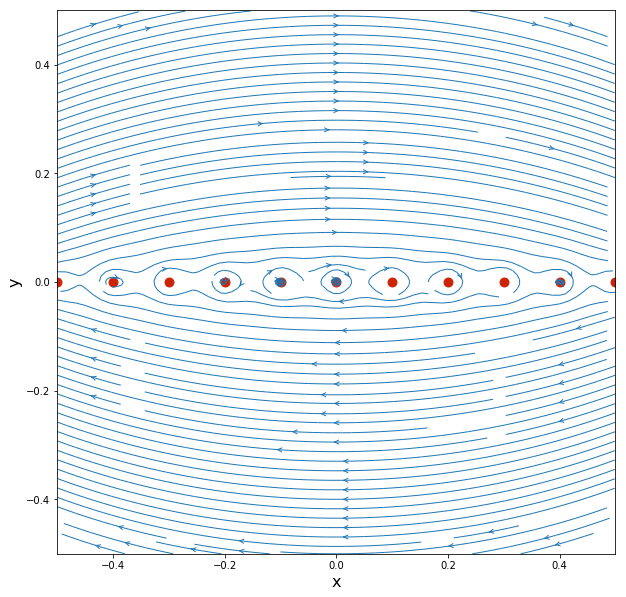

In [45]:
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1,\
                  arrowsize=1, arrowstyle='->')
pyplot.scatter(x_vortex, y_vortex, color='#CD2305', s=80, marker='o');

In [46]:
pi = 3.14
v_rea = -gamma / (2.*0.1)*numpy.sin (2.*pi*X/0.1) / (numpy.cosh(2.*pi*Y/0.1) - numpy.cos(2.*pi*X/0.1))
u_rea =  gamma / (2.*0.1)*numpy.sinh(2.*pi*Y/0.1) / (numpy.cosh(2.*pi*Y/0.1) - numpy.cos(2.*pi*X/0.1))

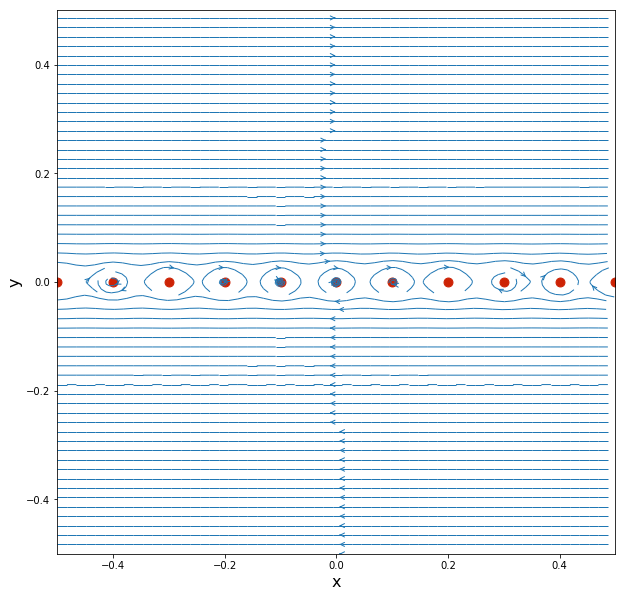

In [47]:
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u_rea, v_rea, density=2, linewidth=1,\
                  arrowsize=1, arrowstyle='->')
pyplot.scatter(x_vortex, y_vortex, color='#CD2305', s=80, marker='o');

In [27]:
def get_velocity_sink(strength, xs, ys, X, Y):
    u = strength/(2*math.pi)*(X-xs)/((X-xs)**2+(Y-ys)**2)
    v = strength/(2*math.pi)*(Y-ys)/((X-xs)**2+(Y-ys)**2)
    
    return u, v

In [28]:
def get_stream_function_sink(strength, xs, ys, X, Y):
    psi = strength/(2*math.pi)*numpy.arctan2((Y-ys), (X-xs))
    
    return psi

In [29]:
u_sink, v_sink = get_velocity_sink(strength_sink, x_sink, y_sink, X, Y)
psi_sink = get_stream_function_sink(strength_sink, x_sink, y_sink, X, Y)

NameError: name 'strength_sink' is not defined

In [16]:
u = u_vortex + u_sink
v = v_vortex + v_sink
psi = psi_vortex + psi_sink

size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1,\
                  arrowstyle='->')
pyplot.scatter(x_vortex, y_vortex, color='#CD2305', s=80, marker='o');

NameError: name 'u_sink' is not defined